# Time Series (Stock) Prediction Using LSTM 

In [1]:
from tensorflow import keras 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime

### Exploratory Analysis of the Data

In [29]:
data = pd.read_csv("AppleStock.csv")

data['datetime'] = pd.to_datetime(data['datetime'])

data = data.sort_values(by=['datetime'], ascending=True)

print(data.head())
print(data.info())
print(data.describe())

      datetime       open       high     low      close    volume
999 2021-09-30  143.66000  144.38000  141.28  141.50000  89056700
998 2021-10-01  141.89999  142.92000  139.11  142.64999  94639600
997 2021-10-04  141.75999  142.21001  138.27  139.14000  98322000
996 2021-10-05  139.49001  142.24001  139.36  141.11000  80861100
995 2021-10-06  139.47000  142.14999  138.37  142.00000  83221100
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 999 to 0
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1000 non-null   datetime64[ns]
 1   open      1000 non-null   float64       
 2   high      1000 non-null   float64       
 3   low       1000 non-null   float64       
 4   close     1000 non-null   float64       
 5   volume    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 54.7 KB
None
                         datetime         open         high  

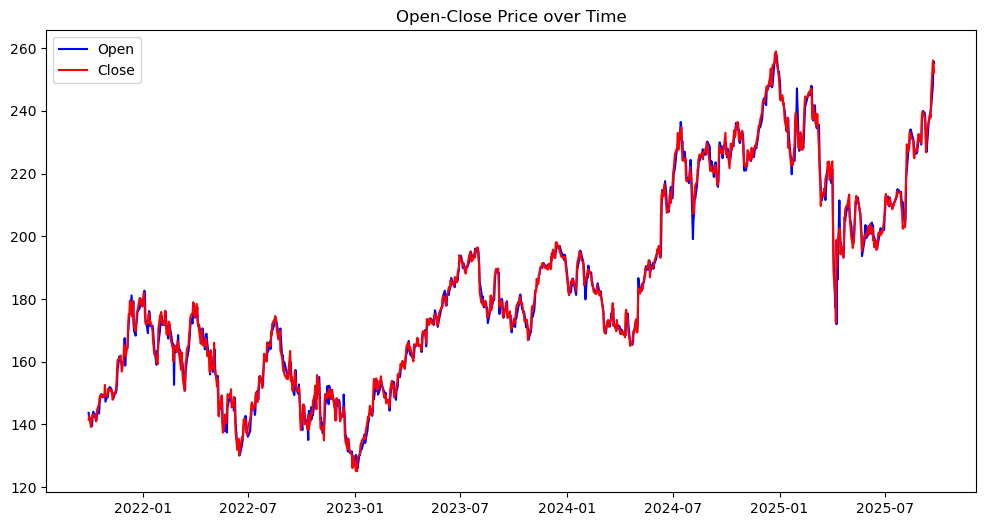

In [30]:
#verifying open and close are loosely related

plt.figure(figsize=(12,6))
plt.plot(data['datetime'], data['open'], label="Open",color="blue")
plt.plot(data['datetime'], data['close'], label="Close",color="red")
plt.title("Open-Close Price over Time")
plt.legend()
plt.show()

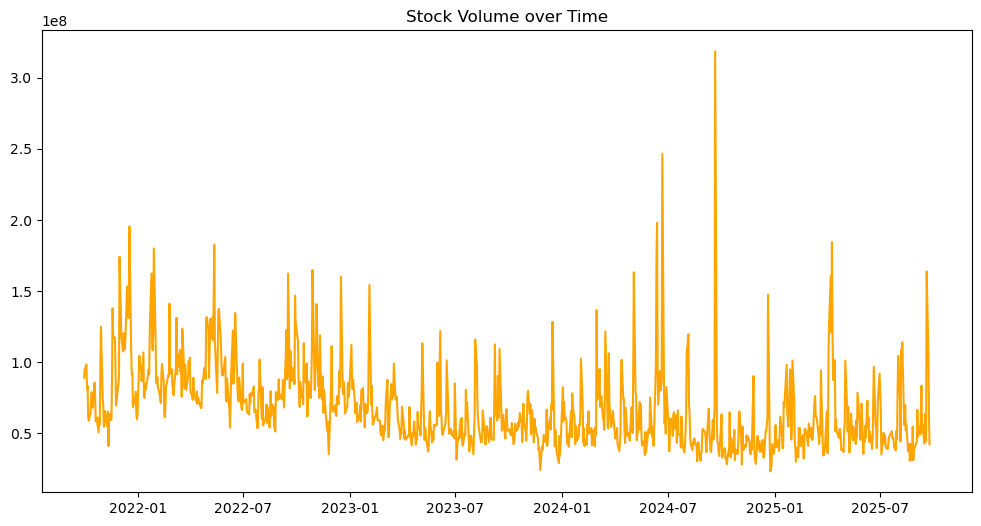

In [31]:
plt.figure(figsize=(12,6))
plt.plot(data['datetime'],data['volume'],label="Volume",color="orange")
plt.title("Stock Volume over Time")
plt.show()

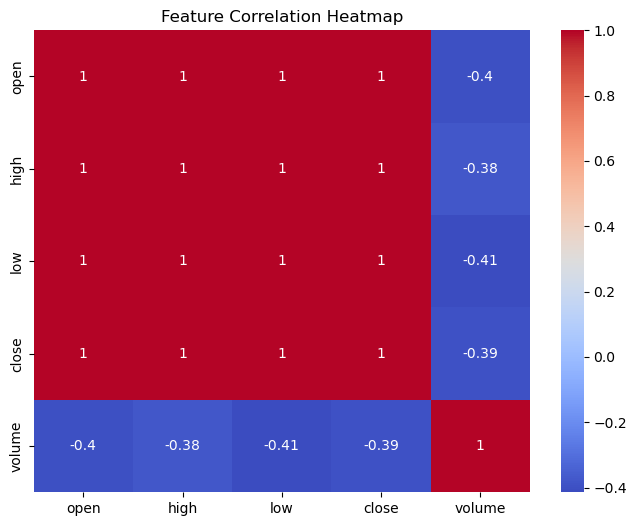

In [32]:
numeric_data = data.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Data Preprocessing

In [33]:
stock_close = data.filter(["close"])
dataset = stock_close.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [34]:
training_data_len

950

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len]

X_train, y_train = [], []

In [36]:
display(training_data)

array([[-1.36033247e+00],
       [-1.32380770e+00],
       [-1.43528830e+00],
       [-1.37271924e+00],
       [-1.34445200e+00],
       [-1.30348069e+00],
       [-1.31586746e+00],
       [-1.31872563e+00],
       [-1.36001518e+00],
       [-1.37907143e+00],
       [-1.28855305e+00],
       [-1.25425091e+00],
       [-1.19993969e+00],
       [-1.12974831e+00],
       [-1.11386784e+00],
       [-1.10688012e+00],
       [-1.13197126e+00],
       [-1.13355931e+00],
       [-1.11196155e+00],
       [-1.12688919e+00],
       [-1.00873847e+00],
       [-1.09671661e+00],
       [-1.12339549e+00],
       [-1.08972920e+00],
       [-1.04304029e+00],
       [-1.05987360e+00],
       [-1.04971041e+00],
       [-1.07638961e+00],
       [-1.06463806e+00],
       [-1.15642719e+00],
       [-1.15801524e+00],
       [-1.09068172e+00],
       [-1.09036442e+00],
       [-1.05860348e+00],
       [-9.79518401e-01],
       [-8.40405772e-01],
       [-7.55286435e-01],
       [-7.40358790e-01],
       [-7.2

In [37]:
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the Model

In [38]:
model = keras.models.Sequential()

# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))

# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))

# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

# Final Output Layer
model.add(keras.layers.Dense(1))

c:\Users\Jeet\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()
model.compile(
    optimizer="adam",
    loss="mae",
    metrics=[keras.metrics.RootMeanSquaredError()]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
training = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4149 - root_mean_squared_error: 0.5848
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2186 - root_mean_squared_error: 0.2904
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2093 - root_mean_squared_error: 0.2788
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1882 - root_mean_squared_error: 0.2552
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1827 - root_mean_squared_error: 0.2507
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1740 - root_mean_squared_error: 0.2339
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1693 - root_mean_squared_error: 0.2331
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1710 - root_mean_squared_error: 0.2350
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1663 - root_mean_squared_error: 0.2257
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1502 - root_mean_squared_error: 0.2041

### Testing the model

In [41]:
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

In [42]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [43]:
train = data[:training_data_len]
test =  data[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

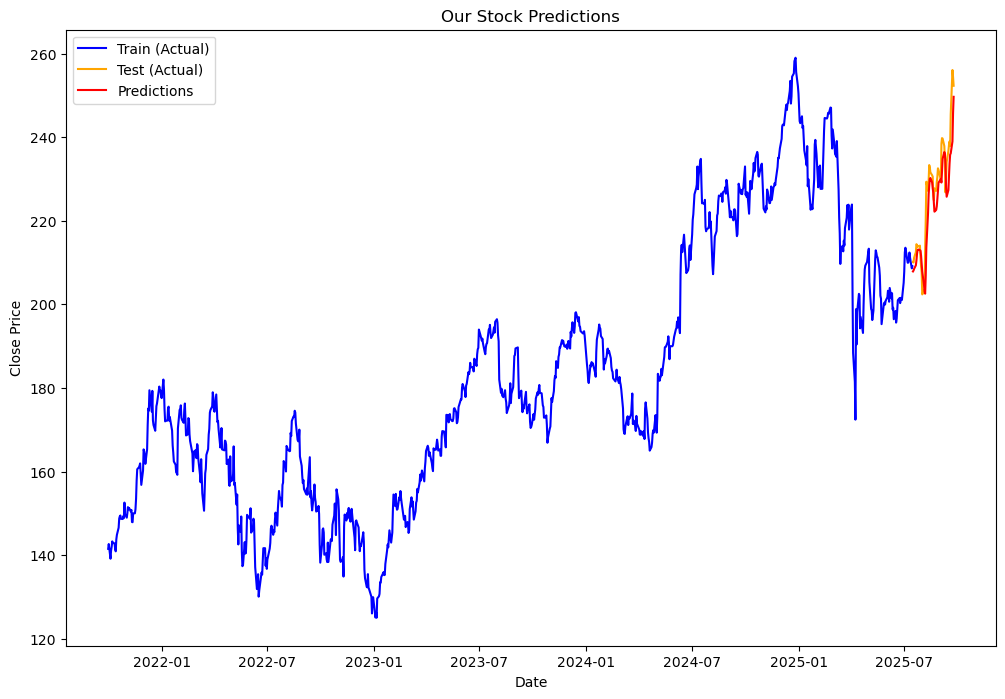

In [44]:
plt.figure(figsize=(12,8))
plt.plot(train['datetime'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['datetime'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['datetime'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()